## Graph Isomorphism
***

#### Graph Isomorphism Problem
***
Graph Isomorphism gained prominence in the 1970s, it is deciding if two graphs are structurely indetical, or isomorphic. Isomorphic itself means being indentical or similar shape. Naturally the problem with this is if you see two graphs which seem to be the same and end up not being the same. The example below is one I found on molecular graphs which look the same however there is a small difference on the far left 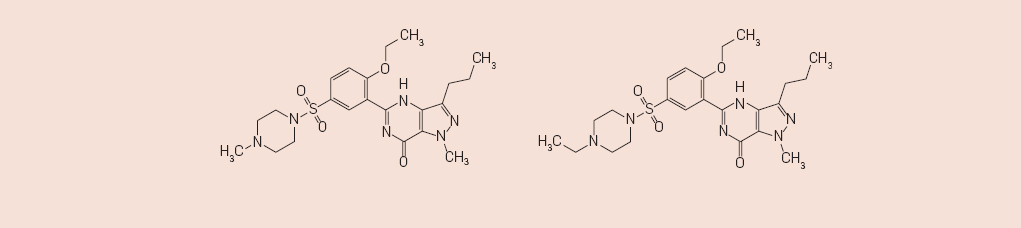
#### Graphs represented in data structure
***
Graph representation is a technique to store graph into the memory of computer.

   1)Adjacency Matrix - is a sequential representation, used to reprsent nodes which are adjacent to each other, edge connecting nodes to graph
   
   2)Incidence Matrix - incidence matrix, graphs can be represented using a matrix of size, total num of vertices by total number of edges, if a graph has 2 vertices and 4 edges, its represented as 2x4, columns are edges and rows are vertices
   
   3)Adjacency List - Adjacency List is linked, each vertex in the graph we have list of neighbouring elements

In [65]:
import matplotlib.pyplot as plt
import numpy as np #provides numerical arrays in python written in C
import itertools as it
import networkx as nx # provides algorithms for graphs using it for visualising graphs
import math

In [66]:
plt.rcParams['figure.figsize'] = (14, 6)

In [67]:
#drawing params
params = {'node_color': 'red', 'node_size':800, 'font_size': 18, 'with_labels':True}

## Graphs
***

In [68]:
#making empty graph
#constructor of instance difined in networkx
G = nx.Graph()

In [69]:
#using tuple using array/lists that cant be changed
# three elements in tuple, three nodes three edges
#cant use sets
E = ((1,0),(1,2),(0,2))

In [70]:
# adding tuple edges
G.add_edges_from(E)

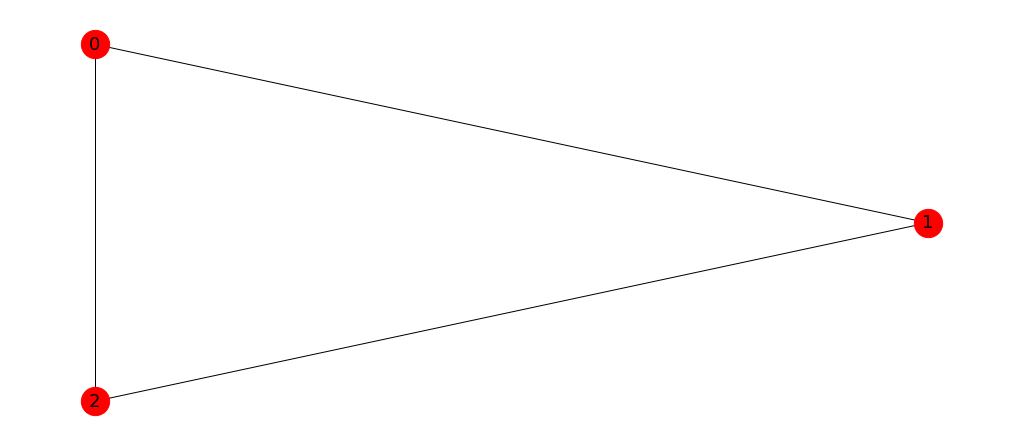

In [71]:
#can see all edges connected
nx.draw_circular(G, **params)

## Adjacency Matrices
***

In [72]:
#first row and col relate to 0
#0 no connection, 1 connection float not really suitable for binary
print(nx.to_numpy_array(G))

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [73]:
#convert to unassigned 8 bit integer
A = nx.to_numpy_array(G).astype(np.uint8)
print(A)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [74]:
#transpose is where you take rows, turn into cols, and use that as matrix
print(A.T) # numpy has method with T which transpose the matrix

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [75]:
# ask T are they all ==
print(A.T == A)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [76]:
(A.T == A).all()

True

In [77]:
#cleaner way of getting matrix without []
def matrix_print(A):
    for r in A:
        print(str(r)[1:-1])
    print()

In [78]:
#easier to read
matrix_print(A)

0 1 1
1 0 1
1 1 0



## Permutations
***

In [79]:
# one to four as thats to three rather than starting at 0 looks cleaner
L = list(range(1,4))
L

[1, 2, 3]

In [80]:
#permutations how many time such a element may be swapped
#grows factoral in length of list, very bad case senario although not the worst
perms = it.permutations(L)

for perm in perms:
    print(perm)
#six permutations of 3
#perms generator generating one at a time

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


## Permutation Matrices
***

In [81]:
N = 3

In [82]:
#np will take a python gernerator and cast into an array
#making array for 1 to N, one dimensional array
L = np.array(range(1, N+1)).astype(np.uint8)
L

array([1, 2, 3], dtype=uint8)

In [83]:
#identity matrix zero everywhere bar diagonal left to right
#if you multi on right or left with another matrix get the same matrix back
I = np.identity(N).astype(np.uint8)
matrix_print(I)

1 0 0
0 1 0
0 0 1



In [84]:
#list(p) each time go around p, passed as list not tuple,give I first second third element
#permutation of rows on identity matrix, matrix with all zero bar having a one in a row
perms = it.permutations(range(N))
for p in perms:
    Pmat = I[list(p)]
    matrix_print(Pmat)

1 0 0
0 1 0
0 0 1

1 0 0
0 0 1
0 1 0

0 1 0
1 0 0
0 0 1

0 1 0
0 0 1
1 0 0

0 0 1
1 0 0
0 1 0

0 0 1
0 1 0
1 0 0



In [85]:
perms = it.permutations(range(N))

#treat np array above as matrix
for p in perms:
    Pmat = I[list(p)]
    Lp = L * Pmat # not matrix multi @ operator to multi two matrices
    
    print(Lp)


[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[1 0 0]
 [0 0 3]
 [0 2 0]]
[[0 2 0]
 [1 0 0]
 [0 0 3]]
[[0 2 0]
 [0 0 3]
 [1 0 0]]
[[0 0 3]
 [1 0 0]
 [0 2 0]]
[[0 0 3]
 [0 2 0]
 [1 0 0]]


In [86]:
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    Ap = Pmat @ A @ Pmat.T 
    
    matrix_print(Ap)

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0



## Matrix Multiplication
***

In [87]:
A = np.array([[1,2],[3,4]], dtype=np.uint8)
matrix_print(A)

1 2
3 4



In [88]:
I = np.identity(2, dtype=np.uint8)
matrix_print(I)

1 0
0 1



In [89]:
# 1*1 = 1, 2*0 = 0, 3*0 = 0, 1*4 = 4
matrix_print(A * I)

1 0
0 4



In [90]:
#if you multi anything by identity matrix you get same matrix back again
matrix_print(A @ I)

1 2
3 4



In [91]:
P = np.array([[0,1],[1,0]], dtype=np.uint8)
matrix_print(P)

0 1
1 0



In [92]:
#cols have been permuted, switch A & P, rows will be permuted
matrix_print(A @ P)

2 1
4 3



In [93]:
matrix_print(A)

1 2
3 4



In [94]:
np.all(P == P.T)

True

In [95]:
I = np.identity(3, dtype=np.uint8)
matrix_print(I)

1 0 0
0 1 0
0 0 1



In [96]:
P = I[[1, 0, 2]]
matrix_print(P)

0 1 0
1 0 0
0 0 1



In [97]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
matrix_print(A)

1 2 3
4 5 6
7 8 9



In [98]:
matrix_print(A @ P)

2 1 3
5 4 6
8 7 9



In [99]:
matrix_print(P @ A)

4 5 6
1 2 3
7 8 9



In [100]:
np.all(P.T ==P)

True

In [101]:
matrix_print(A @ P.T)

2 1 3
5 4 6
8 7 9



In [102]:
P = I[[1,2,0]]
matrix_print(P)

0 1 0
0 0 1
1 0 0



In [103]:
np.all(P == P.T)

False

In [104]:
matrix_print(A @ P.T)

2 3 1
5 6 4
8 9 7



In [105]:
matrix_print(P @ A)

4 5 6
7 8 9
1 2 3



In [106]:
matrix_print(A @ P)

3 1 2
6 4 5
9 7 8



## Permuting Vertices
***

In [107]:
N = 3 # number of objects to permute

In [108]:
#list of elements in matrix
L = np.array(range(1, N+1), dtype=np.uint8)
L

array([1, 2, 3], dtype=uint8)

In [109]:
#identity matrix
I = np.identity(N, dtype=np.uint8)
matrix_print(I)

1 0 0
0 1 0
0 0 1



In [110]:
#6 possible 3x3 matrix all permutations
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    matrix_print(Pmat)

1 0 0
0 1 0
0 0 1

1 0 0
0 0 1
0 1 0

0 1 0
1 0 0
0 0 1

0 1 0
0 0 1
1 0 0

0 0 1
1 0 0
0 1 0

0 0 1
0 1 0
1 0 0



In [111]:
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    
    #permuted by Pmat
    Lp = L @ Pmat
    
    print(Lp)

[1 2 3]
[1 3 2]
[2 1 3]
[3 1 2]
[2 3 1]
[3 2 1]


In [112]:
 # use permutation matrix to multiply A
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    
    Ap = Pmat @ A @ Pmat.T
    
    matrix_print(Ap)

1 2 3
4 5 6
7 8 9

1 3 2
7 9 8
4 6 5

5 4 6
2 1 3
8 7 9

5 6 4
8 9 7
2 3 1

9 7 8
3 1 2
6 4 5

9 8 7
6 5 4
3 2 1



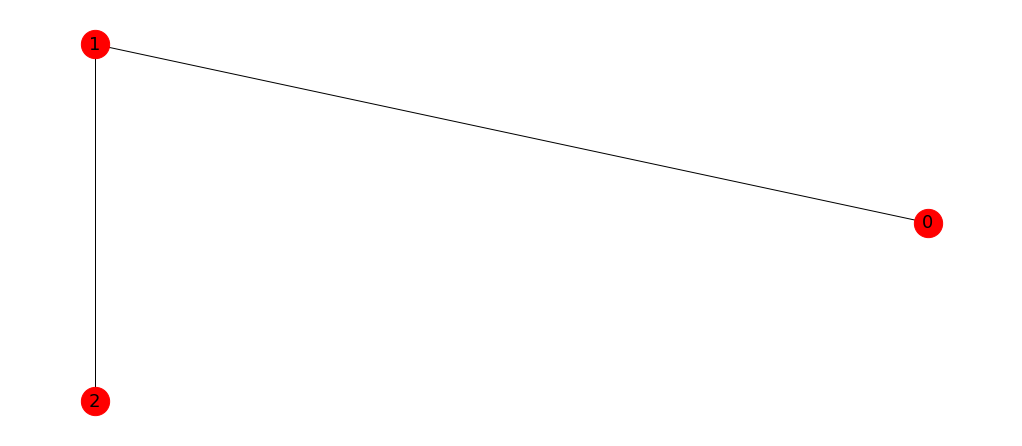

In [113]:
#if we changed 1 and 0 in the graph then it would be isomorphic because the graphs would have same structure,
#but would not be made up in the same way

G = nx.Graph()
E = ((0,1),(1,2))
G.add_edges_from(E)
nx.draw_circular(G, **params)

In [114]:
A = nx.to_numpy_array(G).astype(np.uint8)
matrix_print(A)

0 1 0
1 0 1
0 1 0



In [115]:
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    #get A from above and then permute it using transpose to permutes rows and cols in same way
    Ap = Pmat @ A @ Pmat.T
    
    matrix_print(Ap)

0 1 0
1 0 1
0 1 0

0 0 1
0 0 1
1 1 0

0 1 1
1 0 0
1 0 0

0 1 1
1 0 0
1 0 0

0 0 1
0 0 1
1 1 0

0 1 0
1 0 1
0 1 0



In [116]:
G = nx.Graph()

In [117]:
E = ((0,1), (1,2), (1,3), (2,3))

In [118]:
G.add_edges_from(E)

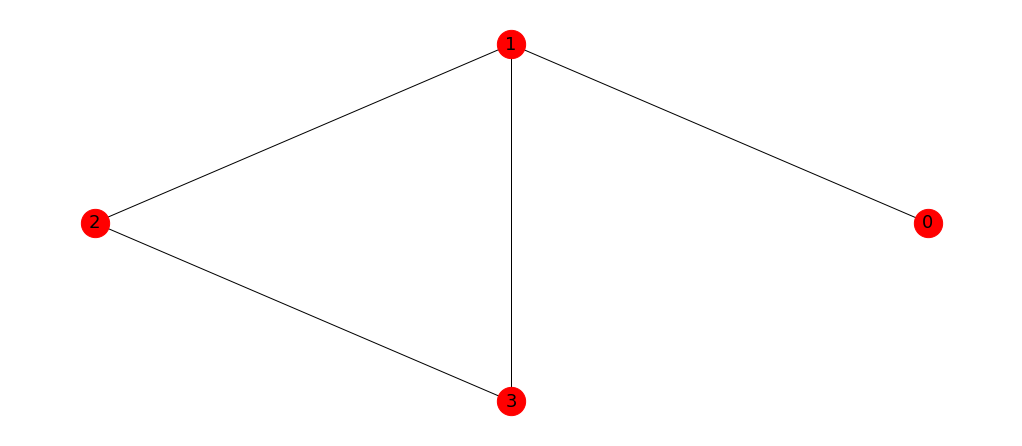

In [119]:
nx.draw_circular(G, **params)

In [120]:
A = nx.to_numpy_array(G).astype(np.uint8)
matrix_print(A)

0 1 0 0
1 0 1 1
0 1 0 1
0 1 1 0



In [121]:
p = [0, 3, 2, 1]

I = np.identity(4, np.uint8)

P = I[p]

matrix_print(P)

1 0 0 0
0 0 0 1
0 0 1 0
0 1 0 0



In [122]:
A_P = P @ A @ P.T
matrix_print(A_P)

0 0 0 1
0 0 1 1
0 1 0 1
1 1 1 0



In [123]:
G_P = nx.from_numpy_matrix(A_P)

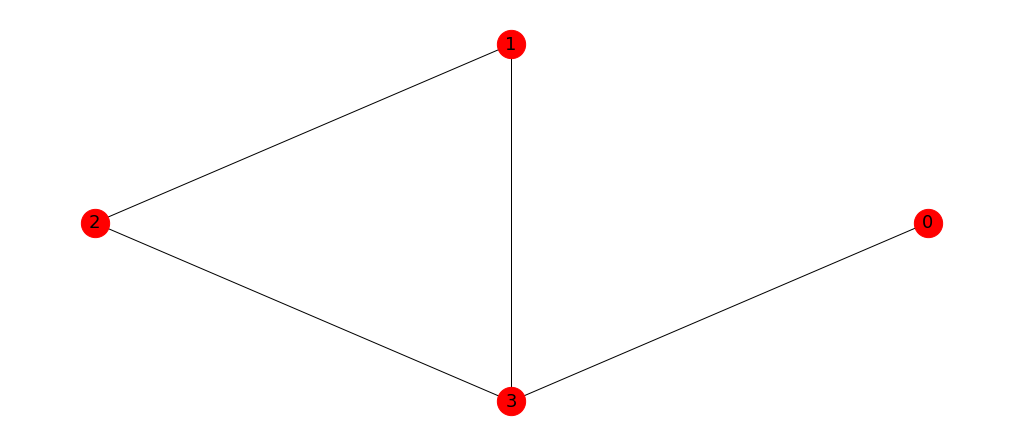

In [124]:
#same matrix with one and three swapped
# Graph Isomorphism is just fancy way of saying the graph is slightly changed e.g labels
nx.draw_circular(G_P, **params)

## Trickey Graph, Peterson Graph
***

In [125]:
G = nx.petersen_graph()

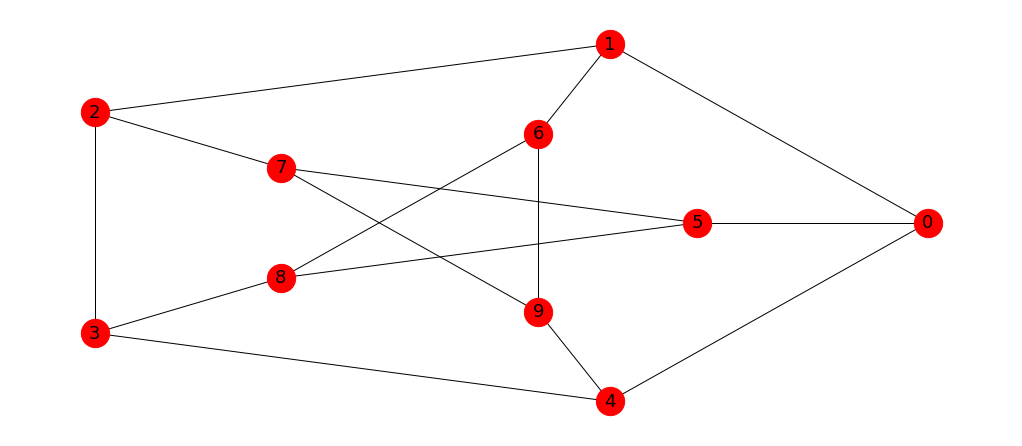

In [126]:
# one connection to each node
pos = nx.shell_layout(G, nlist=[[5,6,7,8,9], [0,1,2,3,4]], rotate=0, center=(2,2))
nx.draw(G, pos=pos, **params)

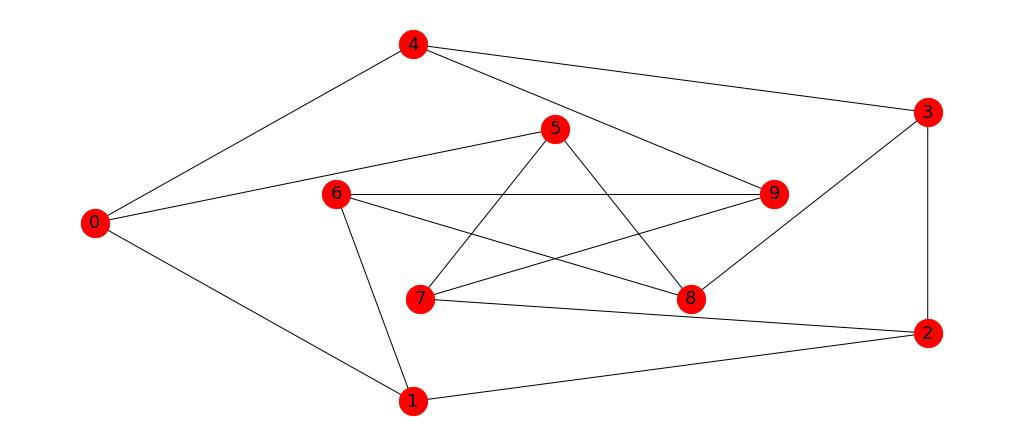

In [127]:
# same graph just rotated some 90 degrees
nx.draw_shell(G, nlist=[range(5, 10), range(0, 5)], **params)

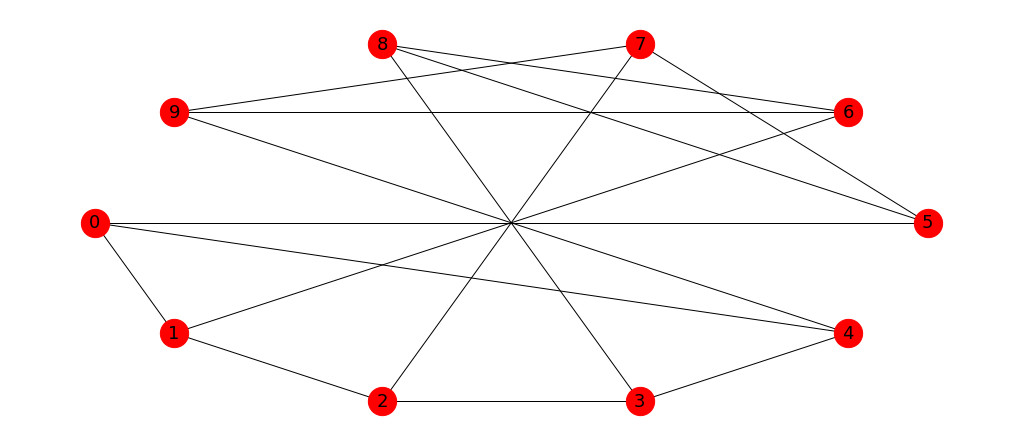

In [128]:
# hard to see if its the same graph to the naked eye
nx.draw_shell(G, **params)

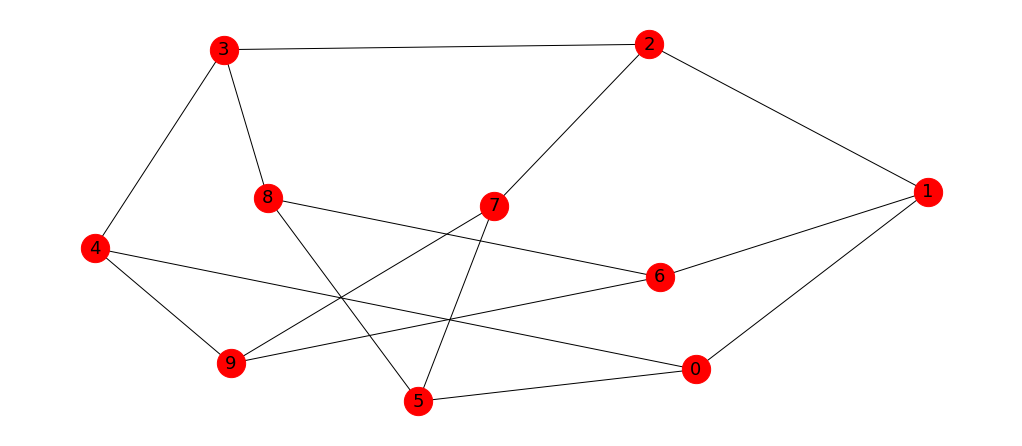

In [129]:
# frows factorial with sze of the input, terrible
nx.draw_kamada_kawai(G, **params)